In [162]:
# importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# DATA PREPROCESSING

In [163]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\dataframe_.csv")
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [164]:
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
data.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [165]:
type(data)

pandas.core.frame.DataFrame

In [166]:
len(data)

1697

In [76]:
data.columns

Index(['input', 'output'], dtype='object')

In [78]:
pd.unique(data["input"])

array([-1.22740667e+02, -1.21531419e+02, -1.34917019e+02, -1.20605951e+02,
       -1.29894781e+02, -1.34366669e+02, -1.15563739e+02, -1.32080161e+02,
       -1.33366669e+02, -1.19524112e+02, -1.25743622e+02, -1.14100895e+02,
       -1.31366669e+02, -1.13278338e+02, -1.33818175e+02, -1.21653543e+02,
       -1.27366669e+02, -1.08499640e+02, -1.11253677e+02, -1.24366669e+02,
       -1.19116602e+02, -1.14410526e+02, -1.22366669e+02, -1.31905360e+02,
       -1.09278368e+02, -1.05504640e+02, -1.12257907e+02, -1.11044048e+02,
       -1.26637640e+02, -1.20366669e+02, -1.25085620e+02, -1.03409788e+02,
       -1.15262637e+02, -1.19366669e+02, -1.04906529e+02, -9.97125535e+01,
       -1.17366669e+02, -1.16332839e+02, -1.25382159e+02, -1.03219985e+02,
       -1.15366669e+02, -1.20275093e+02, -1.13257481e+02, -9.66983513e+01,
       -1.01997441e+02, -1.11902602e+02, -1.30789929e+02, -1.12366669e+02,
       -9.89477182e+01, -1.04681987e+02, -1.12866909e+02, -1.10366669e+02,
       -1.08604445e+02, -

In [79]:
pd.unique(data["output"])

array([-1.30572085e+02, -1.29938929e+02, -1.30141832e+02, -1.25760932e+02,
       -1.12785214e+02, -1.16000000e+02, -1.26267621e+02, -1.32032206e+02,
       -1.14000000e+02, -9.44198555e+01, -1.07499324e+02, -1.13000000e+02,
       -1.17674002e+02, -1.11000000e+02, -9.94390761e+01, -1.27063611e+02,
       -1.28885030e+02, -1.01000000e+02, -9.62162808e+01, -8.50907114e+01,
       -9.30000000e+01, -7.81392752e+01, -8.68140431e+01, -8.90000000e+01,
       -9.21855752e+01, -9.94023837e+01, -7.66055595e+01, -8.60000000e+01,
       -8.59586794e+01, -7.33530660e+01, -9.17469577e+01, -8.10000000e+01,
       -9.49395846e+01, -8.39328386e+01, -8.00448012e+01, -8.00000000e+01,
       -9.53793126e+01, -6.63681852e+01, -7.50000000e+01, -5.71508993e+01,
       -8.18234367e+01, -5.99087513e+01, -7.00000000e+01, -7.80878377e+01,
       -5.93006310e+01, -5.40991185e+01, -6.70000000e+01, -8.38759736e+01,
       -7.37940120e+01, -8.38273315e+01, -6.10000000e+01, -5.78221860e+01,
       -7.69771902e+01, -

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [80]:
data.mean()

input      1.159933
output   -34.088017
dtype: float64

In [81]:
data.dtypes

input     float64
output    float64
dtype: object

In [82]:
data.count()

input     1696
output    1696
dtype: int64

In [84]:
data2=data.drop_duplicates()
data2

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1105,-112.018496,121.096397
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


In [6]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [8]:
data.shape

(1697, 2)

In [9]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [10]:
data['input'].value_counts()

-125.366669    11
 112.633331    10
-131.366669     8
-119.366669     8
 80.633331      7
               ..
-14.879573      1
-7.366669       1
 0.106496       1
 0.641190       1
-110.344221     1
Name: input, Length: 991, dtype: int64

In [11]:
data['output'].value_counts()

-95.000000     32
-33.000000     12
-78.000000     12
-32.000000     10
-75.000000     10
               ..
-108.925420     1
-80.761170      1
-89.922634      1
-109.797457     1
 123.087950     1
Name: output, Length: 969, dtype: int64

In [74]:
data.duplicated().sum()

606

# Handling Outliers

In [85]:
'''Determining the upper cut off and lower cutoff with following 3 methods
1) Percentile Method
2) IQR Method
3) Standard Deviation Method
'''

'Determining the upper cut off and lower cutoff with following 3 methods\n1) Percentile Method\n2) IQR Method\n3) Standard Deviation Method\n'

# DATA VIZUALIZATION

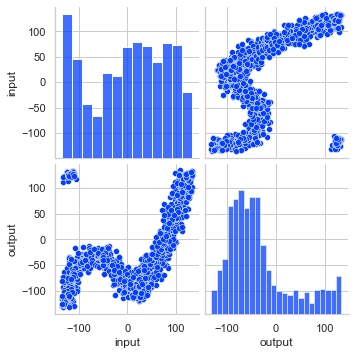

In [75]:
sns.pairplot(data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='input', ylabel='output'>

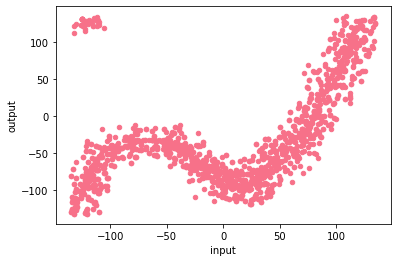

In [14]:
data.plot(kind='scatter',x='input',y='output')

<AxesSubplot:xlabel='input', ylabel='output'>

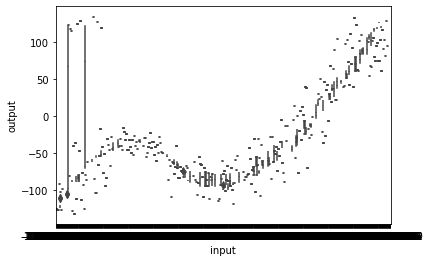

In [15]:
sns.boxplot(x='input',y='output',data=data)

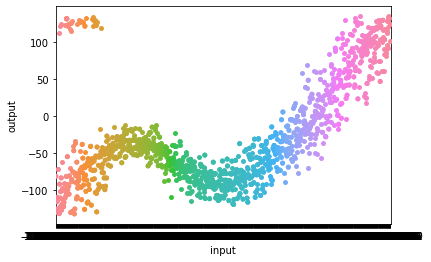

In [16]:
ax = sns.stripplot(data=data, x='input', y='output', jitter=True, edgecolor='green')

<AxesSubplot:xlabel='input', ylabel='output'>

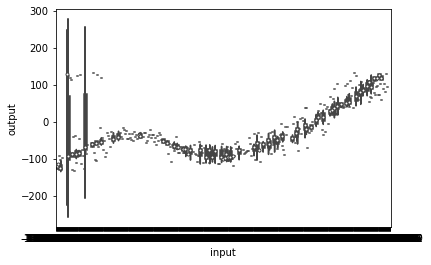

In [17]:
sns.violinplot(x='input',y='output', data=data, size=6) 

<AxesSubplot:title={'center':'input'}, xlabel='[output]'>

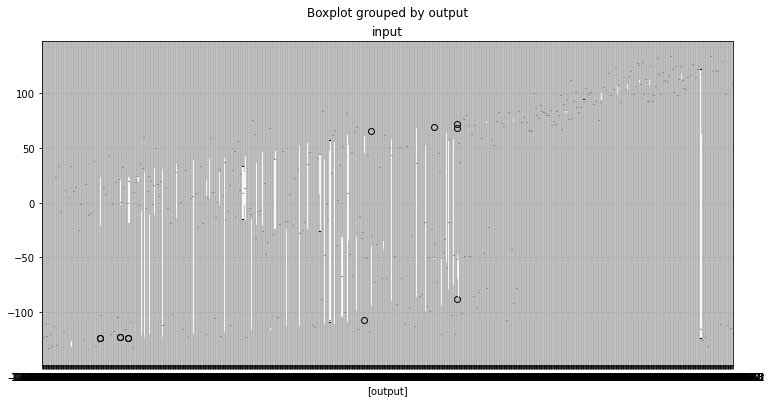

In [18]:
data.boxplot(by='output', figsize=(12,6))

In [23]:
X_train = data[['input','output']]
y_train = data.output
X_test = data[['input','output']]
y_test = data.output

In [27]:
data1=data.dropna()
data1

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


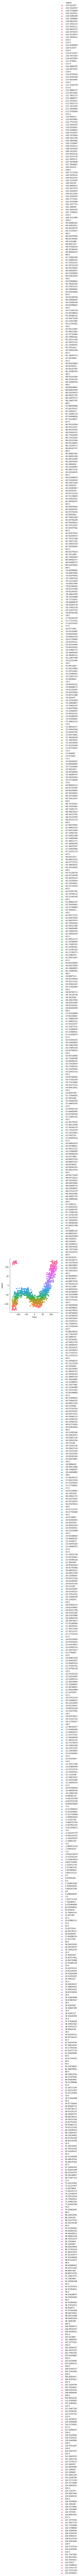

In [29]:
sns.FacetGrid(data, hue='output', height=5)\
   .map(plt.scatter, 'input', 'output')\
   .add_legend()

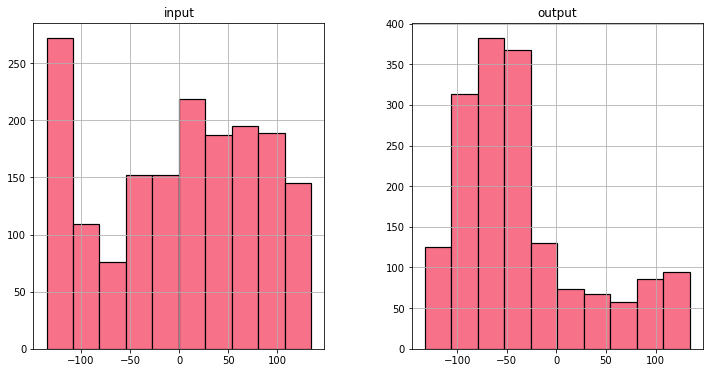

In [30]:
data1.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

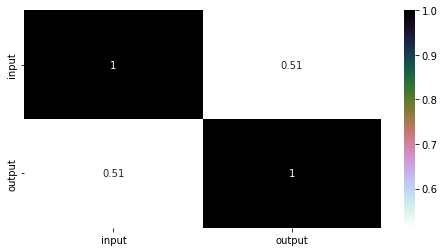

In [31]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')  
plt.show()

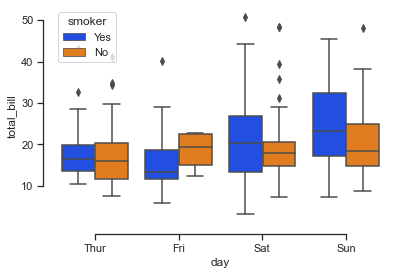

In [50]:
sns.set(style="ticks", palette="bright")

tips = sns.load_dataset("tips")

sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

sns.despine(offset=10, trim=True)

plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

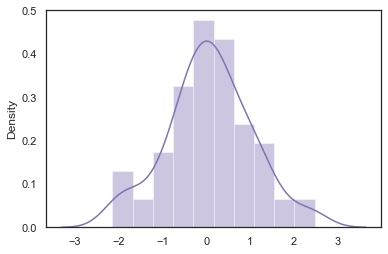

In [51]:
sns.set(style="white")
rs=np.random.RandomState(10)
d=rs.normal(size=100)
sns.distplot(d,kde=True,color="m")

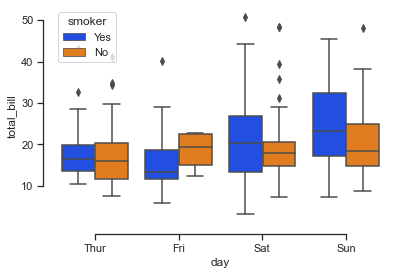

In [52]:
sns.set(style="ticks", palette="bright")

tips = sns.load_dataset("tips")

sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

sns.despine(offset=10, trim=True)

plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='output'>

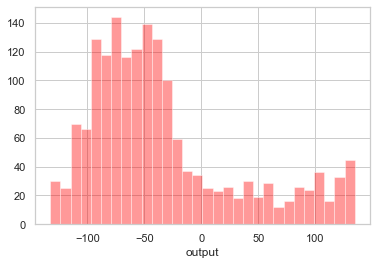

In [57]:
sns.set_style('whitegrid')
sns.distplot(data1['output'],kde=False,color='red',bins=30)

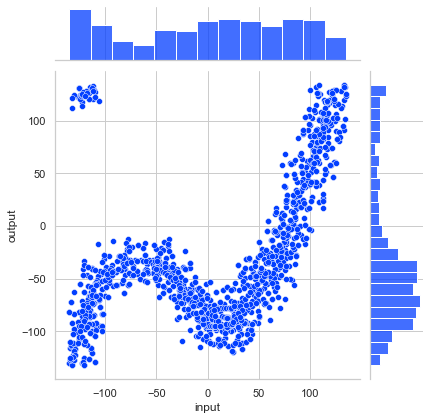

In [63]:
sns.jointplot(x='input',y='output',data=data)

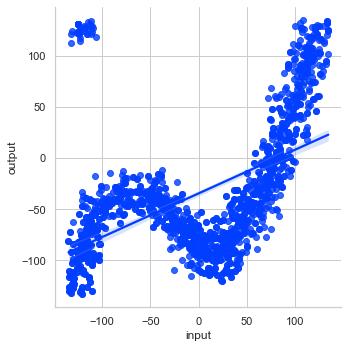

In [65]:
sns.lmplot(x="input", y="output", data=data)

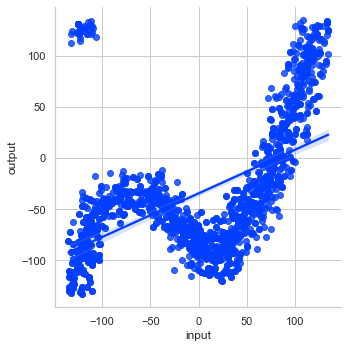

In [66]:
sns.lmplot(x="input", y="output", data=data)

<AxesSubplot:xlabel='input'>

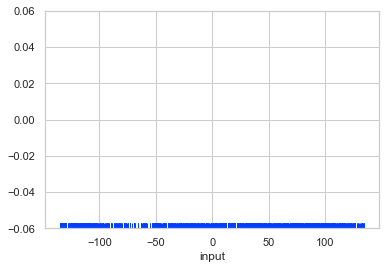

In [68]:
sns.rugplot(data['input'])

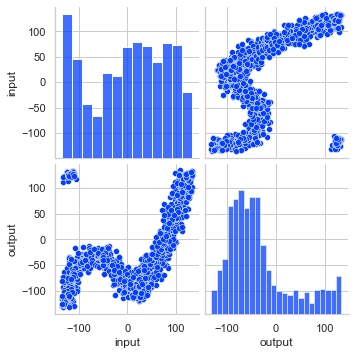

In [72]:
sns.pairplot(data) 
plt.show()

(array([272., 109.,  76., 152., 152., 219., 187., 195., 189., 145.]),
 array([-134.9628386 , -108.00597722,  -81.04911584,  -54.09225446,
         -27.13539308,   -0.1785317 ,   26.77832968,   53.73519106,
          80.69205244,  107.64891382,  134.6057752 ]),
 <BarContainer object of 10 artists>)

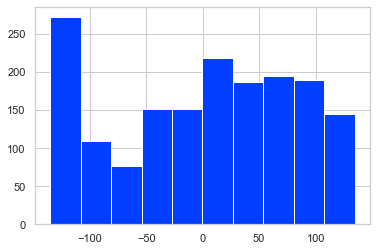

In [73]:
plt.hist(data['input'])

# HYPERPARAMETER TUNING AND FEATURE ENGINEERING
AND PROPER OUTLIER DETECTION AND TREATMENT

In [88]:
x=data.drop('output',axis=1)
y=data['output']

In [89]:
x

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781
...,...
1692,25.410184
1693,29.537304
1694,31.633331
1695,29.091458


In [90]:
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1696, dtype: float64

# Building a Linear Regression model by performing appropriate feature engineering.

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr = LinearRegression()

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

In [109]:
lr.score(x_test, y_test).round(3)

0.3

In [110]:
lr.score(x_train, y_train).round(3)

0.25

In [112]:
y_pred = lr.predict(x_test)

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
import math

In [115]:
math.sqrt(mean_squared_error(y_test, y_pred))

57.37076813234768

In [118]:
data_new = x_train[:1]

In [119]:
lr.predict(data_new)

array([-85.39098284])

In [120]:
y_train[:1]

801   -70.992066
Name: output, dtype: float64

coefficients :  [[0.39630577]]
Intercept :  [-30.88977217]
Estimated Emission : -29.502701989841686
Mean absolute error: 43.58
Mean sum of squares (MSE): 2752.86
R2-score: -2.04


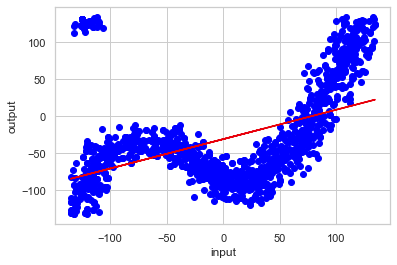

In [125]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
from sklearn import linear_model
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["input"]])
train_y = np.array(train[["output"]])
regr.fit(train_x,train_y)
# The coefficients:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept
# Plotting the regression line:
plt.scatter(train["input"], train["output"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("input")
plt.ylabel("output")
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['input']])
test_y = np.array(test[['output']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

# Multivariable Linear Regression

In [127]:
Y_pred = regr.predict(test_x)
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ("R² :",R)

R² : 0.37522241565970116


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)
classifier = LogisticRegression()
classifier.fit(x, y_transformed)

[  2   4   3 ... 157  64  78]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [138]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [139]:
x_ = transformer.transform(x)

In [140]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [141]:
x_

array([[-1.22740667e+02,  1.50652714e+04],
       [-1.21531419e+02,  1.47698859e+04],
       [-1.34917019e+02,  1.82026020e+04],
       ...,
       [ 3.16333313e+01,  1.00066765e+03],
       [ 2.90914577e+01,  8.46312913e+02],
       [ 1.71452960e+01,  2.93961173e+02]])

In [142]:
model = LinearRegression().fit(x_, y)

In [144]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5579274344847971


In [145]:
print(f"intercept: {model.intercept_}")

intercept: -75.22780843815843


In [146]:
print(f"coefficients: {model.coef_}")

coefficients: [0.51515234 0.00649756]


In [149]:
y_pred = model.predict(x_)

In [150]:
print(f"predicted response:\n{y_pred}")

predicted response:
[-40.57039913 -41.86673833 -26.45807175 ... -52.42992244 -54.74230421
 -64.48533775]


In [151]:
from sklearn.datasets import make_classification

In [153]:
X, Y = make_classification(n_features=2, n_informative=2, n_redundant=0)

# Comparision of models
BernoulliNB is the best machine learning model to fit on given dataset

In [154]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [156]:
bnb = BernoulliNB(binarize=0.0)

In [157]:
bnb.fit(X_train, Y_train)

BernoulliNB()

In [158]:
bnb.score(X_test, Y_test)

0.92

In [159]:
bnb.predict(data)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1])

# FINAL CONCLUSION

Our model best fit over Bernouli Naive Bayes because given dataset is discrete data and Bernouli Naive Bayes works well on discrete datasets